In [466]:
#Import necessary libraries 
import os, sys
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [468]:
#Load the Dataset
df = pd.read_csv("USA_Housing.csv")
#Check the first five records of the dataset 
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [470]:
#Check the number of row's and column's
df.shape

(5000, 7)

In [472]:
#Check the data type of the variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [474]:
#Calculate the count, mean, standard deviation, minimum, maximum, Q1, Q2 and Q3
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [476]:
#Check the missing values 
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

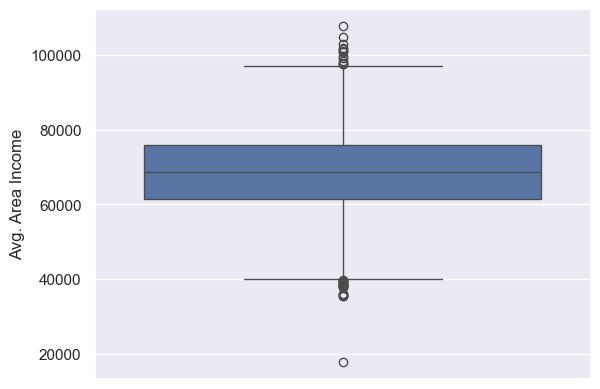

In [478]:
#Check outliers in 'Avg. Area Income' through boxplot
sns.boxplot(y='Avg. Area Income', data = df)
plt.show()

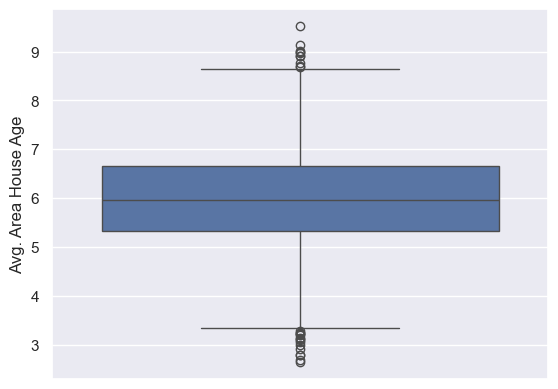

In [480]:
#Check outliers in 'Avg. Area House Age' through boxplot
sns.boxplot(y='Avg. Area House Age', data = df)
plt.show()

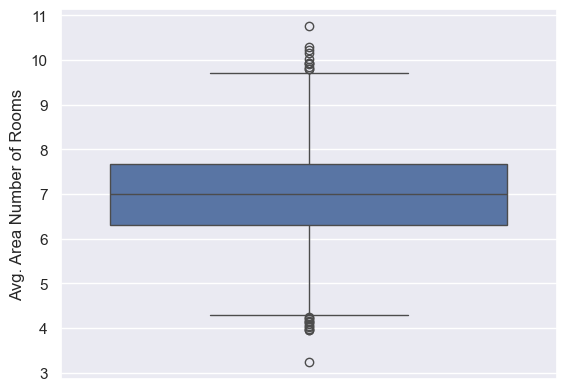

In [482]:
#Check outliers in 'Avg. Area Number of Rooms' through boxplot
sns.boxplot(y='Avg. Area Number of Rooms', data = df)
plt.show()

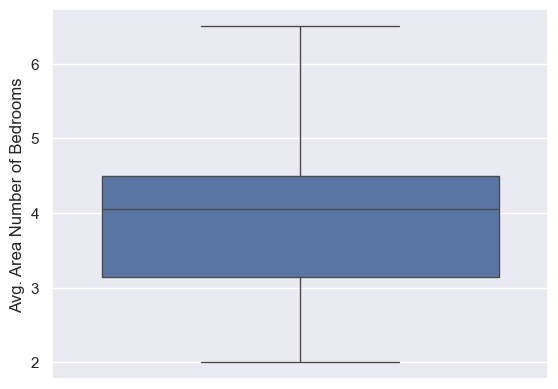

In [484]:
#Check outliers in 'Avg. Area Number of Bedrooms' through boxplot
sns.boxplot(y='Avg. Area Number of Bedrooms', data=df)
plt.show()

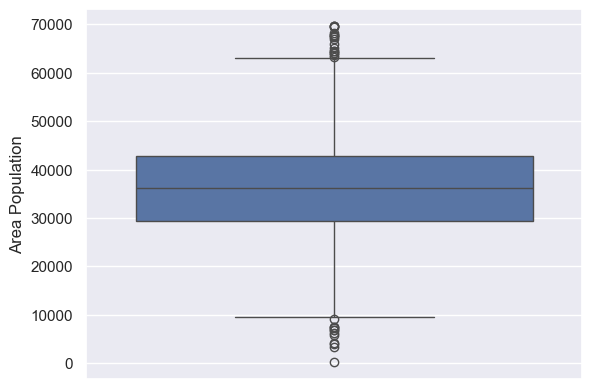

In [486]:
#Check outliers in 'Area Population' through boxplot
sns.boxplot(y='Area Population', data=df)
plt.show()

In [488]:
#Handling outliers 
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
Pos_outlier = Q3 + 1.5 * IQR
Neg_outlier = Q1 - 1.5 * IQR

In [490]:
print(Q1)
print('****************')
print(Q3)
print('****************')
print(IQR)
print('****************')
print(Pos_outlier)
print('****************')
print(Neg_outlier)

Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
****************
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
****************
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64
****************
Avg. Area Income                9.723750e+04
Avg. Area Hou

In [492]:
#Filter the dataset 
filtered_data = df_numeric[~((df_numeric < Neg_outlier) | (df_numeric > Pos_outlier)).any(axis=1)]
non_numerical_columns = df.select_dtypes(exclude=['number']).columns
df_filtered_data = pd.concat([filtered_data, df[non_numerical_columns]], axis = 1).loc[filtered_data.index]

df = df_filtered_data 

In [494]:
#Check the no. of row's and column's after outlier handling 
df.shape

(4865, 7)

In [496]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [498]:
#Drop the unnecessary feature -> Address
df = df.iloc[:,0:-1]

In [500]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [502]:
#Let's Do EDA (Exploaratory Data Analysis)

In [506]:
#Check the correlation between the independent variables 
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


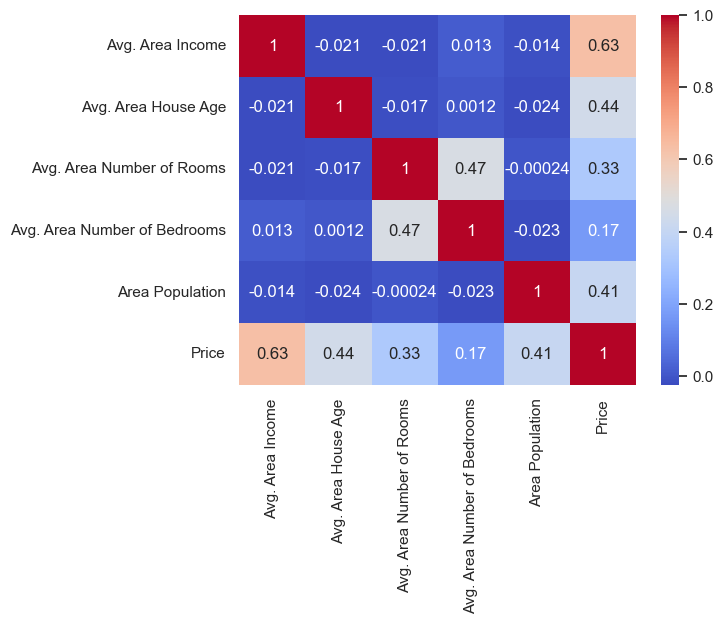

In [508]:
#Make the graphical representation of the correlation 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

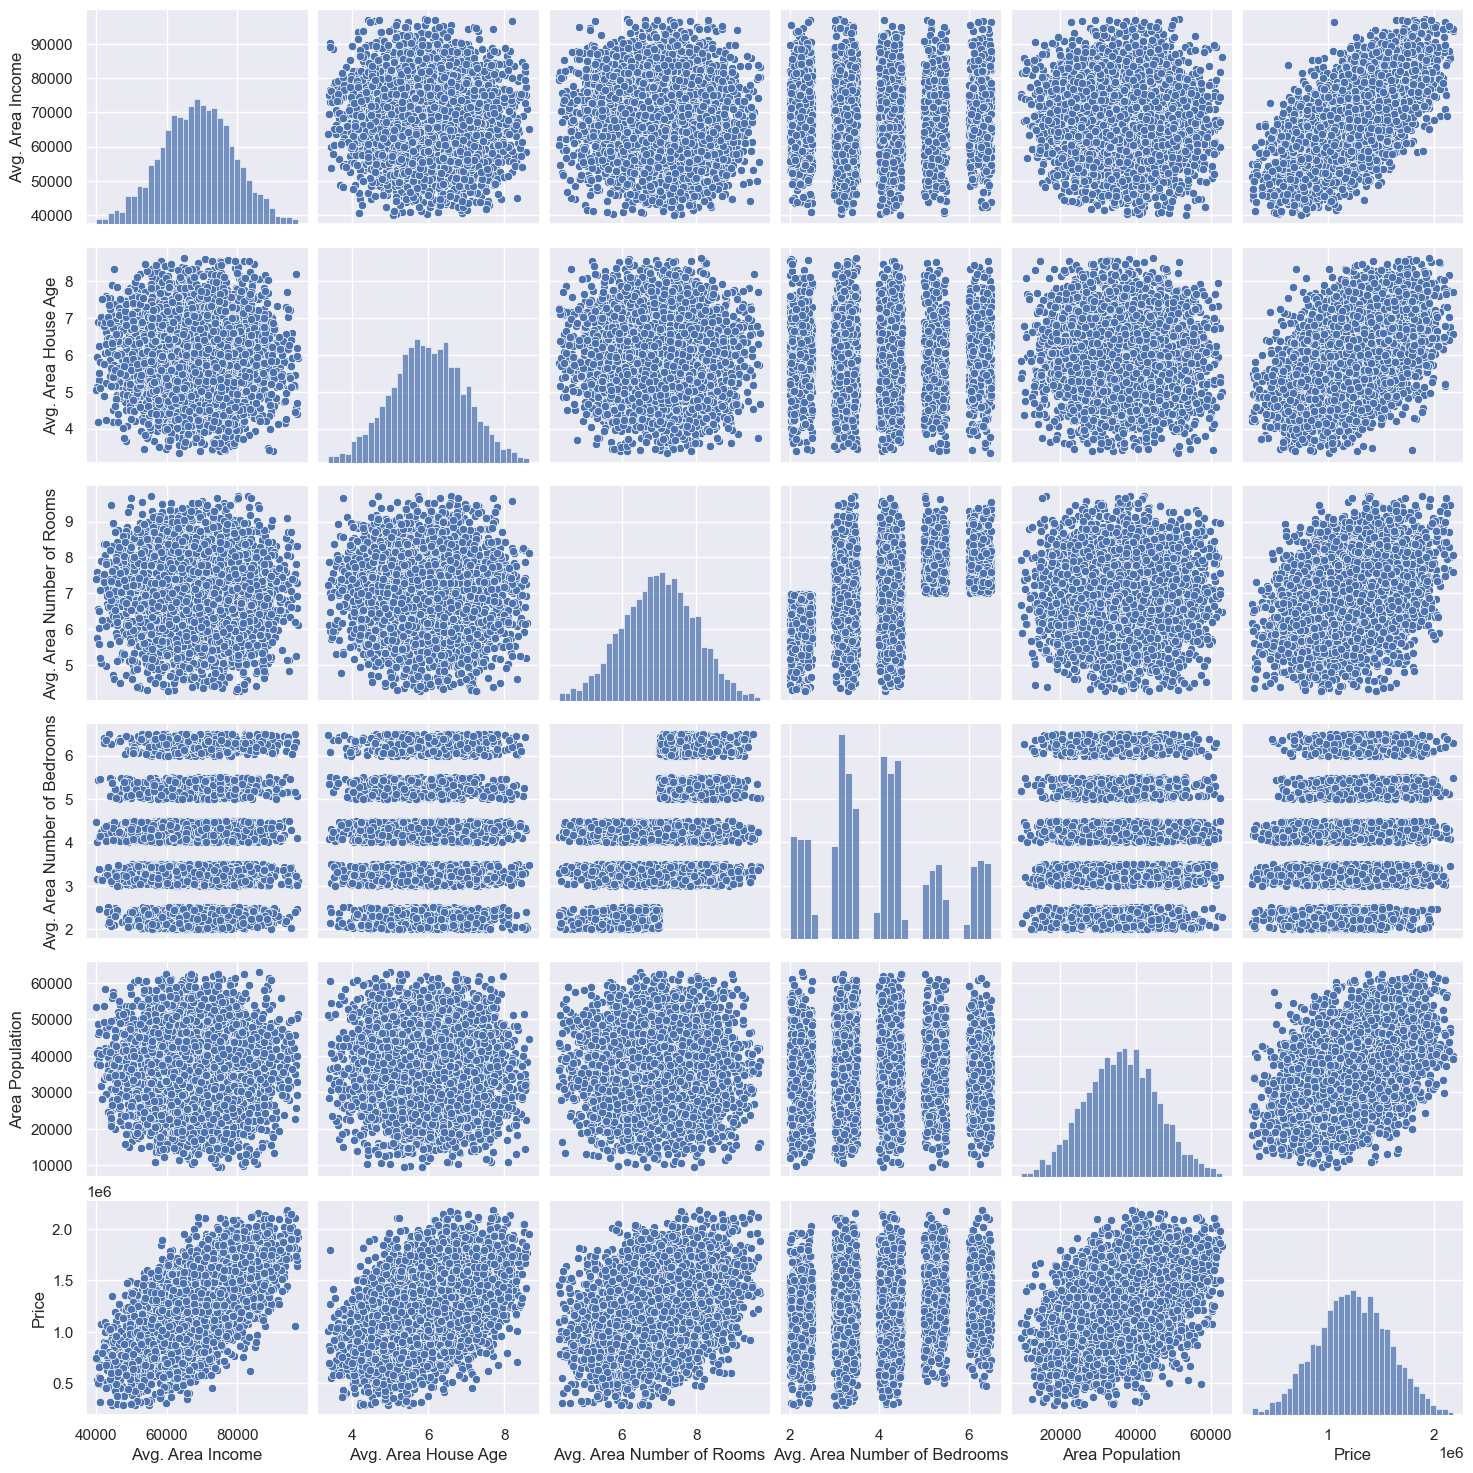

In [510]:
#Make pairplot to check how's the data spread on the graph 
sns.pairplot(df)
plt.show()

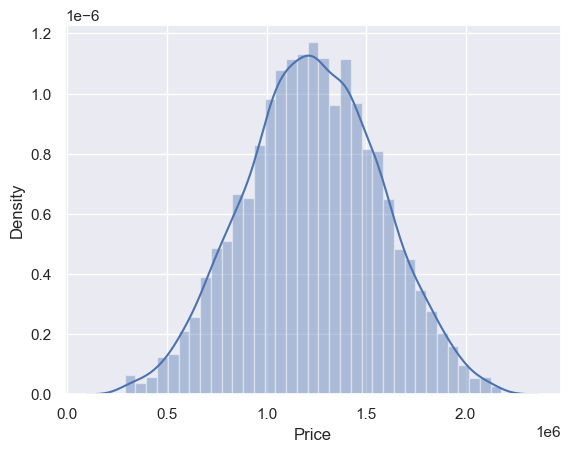

In [512]:
#Make the distplot of dependent variable
sns.distplot(df['Price'])
plt.show()

In [518]:
#Feature scaling:
#first we split the data into independent variable and dependent variable
x = df.iloc[:,0:-1]    #independent variable
y = df['Price']        #dependent variable 

In [520]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [522]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [524]:
#Performing standard scaler 
from sklearn.preprocessing import StandardScaler
Sd = StandardScaler()
x_scaler = Sd.fit_transform(x)
x_scaler

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

In [526]:
#Variance Inflation Factor(VIF) -> To check the multicollinearity relation between independent and dependent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i)
                                    for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


In [532]:
#Split the data into training for building the model and test for predicting and evaluation 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=121)


In [534]:
x_train

array([[-0.4690734 ,  0.73629484,  0.79460749,  0.83896836, -0.11020059],
       [ 1.49525258,  1.16587991, -0.34139646,  0.27219118, -0.31259609],
       [-0.78127312,  0.93014773,  0.75941947,  1.20332512, -0.47221895],
       ...,
       [ 1.67803644,  0.58193706,  0.07446253,  1.11426014, -1.53451671],
       [-0.56563708,  0.81165808, -1.26908309, -0.56178095,  2.37505695],
       [-1.86982831,  1.81982379, -0.24117814, -1.42004354, -0.02644856]])

In [536]:
y_train

2257    1.168994e+06
3205    1.772780e+06
3228    1.159526e+06
3903    8.375402e+05
4715    3.784664e+05
            ...     
2176    1.235748e+06
3676    9.080130e+05
1680    1.500963e+06
4692    1.493623e+06
3494    1.014513e+06
Name: Price, Length: 3892, dtype: float64

In [538]:
#Check the no. of row's and column's in the training and test dataset 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3892, 5) (3892,) (973, 5) (973,)


In [540]:
#Building the Model 
from sklearn.linear_model import LinearRegression 
liner_model = LinearRegression()
liner_model.fit(x_train, y_train)

LinearRegression()

In [548]:
#Predict the model with test data
y_pred = liner_model.predict(x_test)
y_pred

array([1187698.98546692, 1014675.81019846, 1400098.81002481,
       1016063.66547973,  974838.38460716, 1375661.5150741 ,
       1323779.89701085, 1110988.20881701, 1578679.54648544,
       1349118.46454609, 1498051.45040692, 1119866.38527813,
       1125762.96673591,  827271.11765096,  971598.58895094,
       1846060.0301572 , 1758103.32022864,  750679.8097548 ,
       1409528.2981426 , 1394462.09250545, 1541796.56020232,
       1712349.58558924, 1313371.79840377, 1370751.76795179,
       1395967.62598977, 1636348.64504811,  844890.91270053,
        776514.55666274,  997359.91805383, 1061816.57600993,
       1807277.24063239, 1195044.44307122, 1308618.56938272,
       1506659.33980721, 1513039.95242875, 1365215.2780766 ,
       1799040.37181581, 1785805.28846922, 1621993.05281996,
       1518090.80231236, 1711903.91901206, 1079773.66664701,
       1308198.01616018, 1405354.61881837,  857155.2920499 ,
        849274.23309032,  796779.34630263, 1005350.19381306,
        709224.84239611,

In [552]:
#Calculate the accuracy of the model 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9143184407537086

In [554]:
#Building OLS (Ordinary Least Square) method 
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=121)

In [566]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [568]:
reg_model = smf.OLS(endog = y_train1, exog = x_train1).fit()

In [572]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.987e+04
Date:                Sun, 22 Jun 2025   Prob (F-statistic):                        0.00
Time:                        12:37:21   Log-Likelihood:                         -46884.
No. Observations:                3405   AIC:                                  9.378e+04
Df Residuals:                    3400   BIC:                                  9.381e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.0604      0.316     31.835      0.000       9.441      10.680
Avg. Area House Age           5.056e+04   3487.814     14.497      0.000    4.37e+04    5.74e+04
Avg. Area Number of Rooms    -1.067e+04   3847.048     -2.775      0.006   -1.82e+04   -3131.380
Avg. Area Number of Bedrooms  8682.9219   3623.901      2.396      0.017    1577.677    1.58e+04
Area Population                  8.0357      0.388     20.714      0.000       7.275       8.796
==============================================================================
Omnibus:                        9.084   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.468
Skew:                          -0.025   Prob(JB):                       0.0239
Kurtosis:                       2.776   Cond. No.                     9.42e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

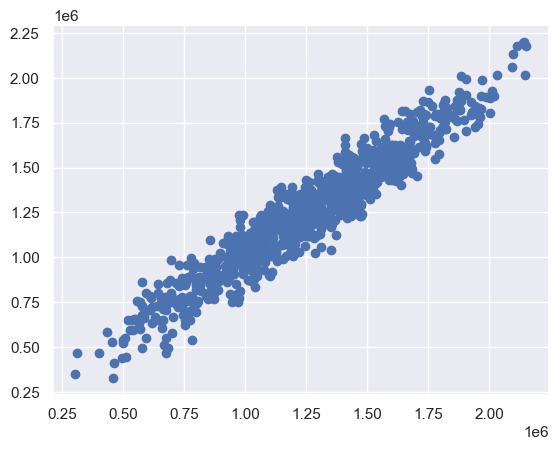

In [580]:
#Check the normality 
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
# Regularisation method to handle overfitting problem
# method = Ridge (L2)
# Lasso (L1)
# ElasticNet(Ridge + lasso)

In [584]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [586]:
Ridge_reg = Ridge(alpha = 0.1)
Ridge_reg.fit(x_train1, y_train1)
Ridge_reg_pred = Ridge_reg.predict(x_test1)
r2_score(y_test1, Ridge_reg_pred)

0.9114859212769906

In [588]:
Lasso_reg = Lasso(alpha = 0.1)
Lasso_reg.fit(x_train1, y_train1)
Lasso_reg_pred = Lasso_reg.predict(x_test1)
r2_score(y_test1, Lasso_reg_pred)

0.9114867050274073

In [590]:
elastic_reg = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic_reg.fit(x_train, y_train)
y_pred_elastic = elastic_reg.predict(x_test)
r2_score(y_test, y_pred_elastic)

0.9111966868330347